In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import random
# from d2l import torch as d2l

In [2]:
dataset_name = 'subjective_belief_observers_features_labels.csv'
data = pd.read_csv(dataset_name)

In [3]:
# check data integrity
observers_predict_label = np.array([0 for _ in range(data.shape[0])])
observers_predict_label.reshape(-1, 1)
true_labels = data.iloc[:, -1]
for i in range(data.shape[0]):
    if data.iloc[i][0][-1] == 'n':
        observers_predict_label[i] = 1
observers_predict_label = pd.DataFrame(observers_predict_label)
correct_trust, correct_doubt, total_trust, total_doubt = 0, 0, 0, 0
for i in range(data.shape[0]):
    if true_labels[i] == 1:
        total_trust += 1
        if observers_predict_label.iloc[i][0] == 1:
            correct_trust += 1
    else:
        total_doubt += 1
        if observers_predict_label.iloc[i][0] == 0:
            correct_doubt += 1

In [4]:
# drop first column of participant id
data.drop(data.columns[0], axis=1, inplace=True)
data = pd.concat([data.iloc[:, -40:-1], observers_predict_label], axis=1)
# normalise input data
for column in data.columns[:-1]:
    # the last column is target
    data[column] = data.loc[:, [column]].apply(lambda x: (x - x.mean()) / x.std())
# according to original dataset 23 participants are involved
num_participants = 23
# 
print(data.shape)

(368, 40)


In [5]:
num_feats = data.shape[1] - 1
num_inputs = num_feats
num_classes = 2

In [6]:
# mini batch iteration
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    # randomly selecting 
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
# hyperparams
num_hidden_neurons = 100
epochs = 200
learning_rate = .01

In [8]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 6, 6)

Epoch: 0/200; Loss: 0.8588; Accuracy: 48.16 %
Epoch: 50/200; Loss: 0.5691; Accuracy: 71.10 %
Epoch: 100/200; Loss: 0.2076; Accuracy: 93.77 %
Epoch: 150/200; Loss: 0.0621; Accuracy: 97.73 %


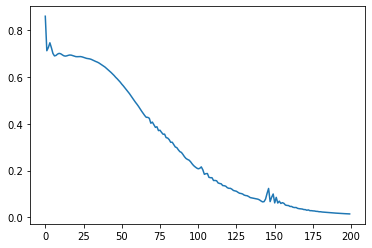

tensor(4.0680, grad_fn=<NllLossBackward>)
Test accuracy total: 46.67 %; correct: 7; wrong: 8;
Test accuracy doubt: 60.00 %; correct: 3; wrong: 2;
Test accuracy no-doubt: 40.00 %; correct: 4; wrong: 6;

Epoch: 0/200; Loss: 0.8403; Accuracy: 51.98 %
Epoch: 50/200; Loss: 0.5316; Accuracy: 74.01 %
Epoch: 100/200; Loss: 0.2021; Accuracy: 93.50 %
Epoch: 150/200; Loss: 0.0382; Accuracy: 99.15 %


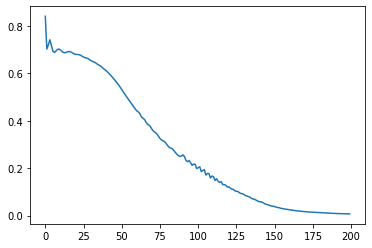

tensor(2.9158, grad_fn=<NllLossBackward>)
Test accuracy total: 50.00 %; correct: 7; wrong: 7;
Test accuracy doubt: 80.00 %; correct: 4; wrong: 1;
Test accuracy no-doubt: 33.33 %; correct: 3; wrong: 6;

Epoch: 0/200; Loss: 0.7578; Accuracy: 52.31 %
Epoch: 50/200; Loss: 0.4484; Accuracy: 79.48 %
Epoch: 100/200; Loss: 0.1683; Accuracy: 94.22 %
Epoch: 150/200; Loss: 0.0176; Accuracy: 100.00 %


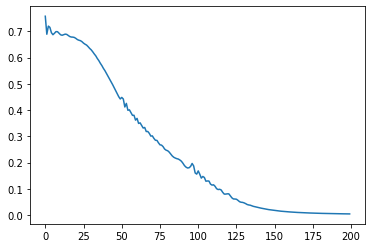

tensor(3.2203, grad_fn=<NllLossBackward>)
Test accuracy total: 59.09 %; correct: 13; wrong: 9;
Test accuracy doubt: 60.00 %; correct: 6; wrong: 4;
Test accuracy no-doubt: 58.33 %; correct: 7; wrong: 5;

Epoch: 0/200; Loss: 0.9837; Accuracy: 47.19 %
Epoch: 50/200; Loss: 0.6756; Accuracy: 61.24 %
Epoch: 100/200; Loss: 0.3189; Accuracy: 85.96 %
Epoch: 150/200; Loss: 0.1344; Accuracy: 96.63 %


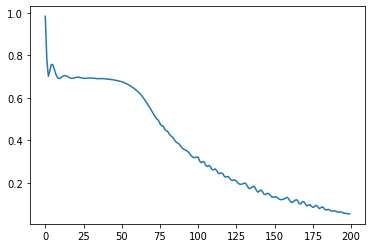

tensor(4.9592, grad_fn=<NllLossBackward>)
Test accuracy total: 41.67 %; correct: 5; wrong: 7;
Test accuracy doubt: 14.29 %; correct: 1; wrong: 6;
Test accuracy no-doubt: 80.00 %; correct: 4; wrong: 1;

Epoch: 0/200; Loss: 0.6974; Accuracy: 53.28 %
Epoch: 50/200; Loss: 0.3178; Accuracy: 85.75 %
Epoch: 100/200; Loss: 0.0471; Accuracy: 99.72 %
Epoch: 150/200; Loss: 0.0069; Accuracy: 100.00 %


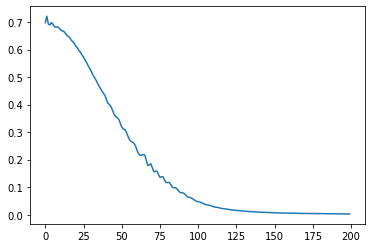

tensor(1.7031, grad_fn=<NllLossBackward>)
Test accuracy total: 58.82 %; correct: 10; wrong: 7;
Test accuracy doubt: 54.55 %; correct: 6; wrong: 5;
Test accuracy no-doubt: 66.67 %; correct: 4; wrong: 2;

Epoch: 0/200; Loss: 0.6925; Accuracy: 52.71 %
Epoch: 50/200; Loss: 0.3486; Accuracy: 85.75 %
Epoch: 100/200; Loss: 0.0398; Accuracy: 99.72 %
Epoch: 150/200; Loss: 0.0052; Accuracy: 100.00 %


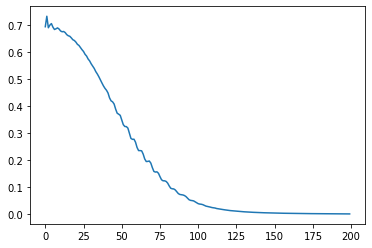

tensor(2.4555, grad_fn=<NllLossBackward>)
Test accuracy total: 64.71 %; correct: 11; wrong: 6;
Test accuracy doubt: 55.56 %; correct: 5; wrong: 4;
Test accuracy no-doubt: 75.00 %; correct: 6; wrong: 2;

Epoch: 0/200; Loss: 1.0523; Accuracy: 46.48 %
Epoch: 50/200; Loss: 0.6765; Accuracy: 59.44 %
Epoch: 100/200; Loss: 0.3884; Accuracy: 81.97 %
Epoch: 150/200; Loss: 0.2171; Accuracy: 90.70 %


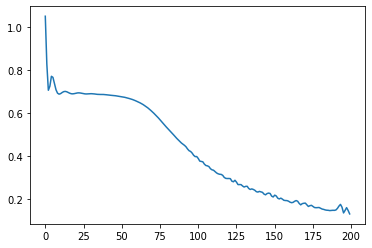

tensor(2.7406, grad_fn=<NllLossBackward>)
Test accuracy total: 46.15 %; correct: 6; wrong: 7;
Test accuracy doubt: 40.00 %; correct: 4; wrong: 6;
Test accuracy no-doubt: 66.67 %; correct: 2; wrong: 1;

Epoch: 0/200; Loss: 0.7154; Accuracy: 52.39 %
Epoch: 50/200; Loss: 0.3962; Accuracy: 81.13 %
Epoch: 100/200; Loss: 0.0851; Accuracy: 98.31 %
Epoch: 150/200; Loss: 0.0153; Accuracy: 100.00 %


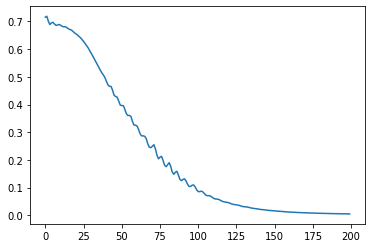

tensor(2.5709, grad_fn=<NllLossBackward>)
Test accuracy total: 76.92 %; correct: 10; wrong: 3;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 85.71 %; correct: 6; wrong: 1;

Epoch: 0/200; Loss: 0.6963; Accuracy: 51.71 %
Epoch: 50/200; Loss: 0.3958; Accuracy: 81.71 %
Epoch: 100/200; Loss: 0.0708; Accuracy: 99.71 %
Epoch: 150/200; Loss: 0.0088; Accuracy: 100.00 %


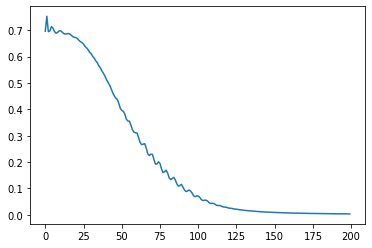

tensor(1.7232, grad_fn=<NllLossBackward>)
Test accuracy total: 72.22 %; correct: 13; wrong: 5;
Test accuracy doubt: 66.67 %; correct: 4; wrong: 2;
Test accuracy no-doubt: 75.00 %; correct: 9; wrong: 3;

Epoch: 0/200; Loss: 0.7388; Accuracy: 53.74 %
Epoch: 50/200; Loss: 0.4268; Accuracy: 82.18 %
Epoch: 100/200; Loss: 0.1204; Accuracy: 96.84 %
Epoch: 150/200; Loss: 0.0150; Accuracy: 100.00 %


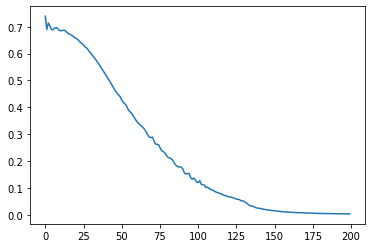

tensor(4.4314, grad_fn=<NllLossBackward>)
Test accuracy total: 35.00 %; correct: 7; wrong: 13;
Test accuracy doubt: 35.71 %; correct: 5; wrong: 9;
Test accuracy no-doubt: 33.33 %; correct: 2; wrong: 4;

Epoch: 0/200; Loss: 0.7881; Accuracy: 47.47 %
Epoch: 50/200; Loss: 0.4490; Accuracy: 80.06 %
Epoch: 100/200; Loss: 0.1054; Accuracy: 97.47 %
Epoch: 150/200; Loss: 0.0140; Accuracy: 100.00 %


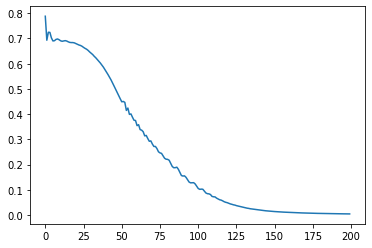

tensor(0.9873, grad_fn=<NllLossBackward>)
Test accuracy total: 75.00 %; correct: 9; wrong: 3;
Test accuracy doubt: 83.33 %; correct: 5; wrong: 1;
Test accuracy no-doubt: 66.67 %; correct: 4; wrong: 2;

Epoch: 0/200; Loss: 0.7227; Accuracy: 47.25 %
Epoch: 50/200; Loss: 0.3359; Accuracy: 85.80 %
Epoch: 100/200; Loss: 0.0698; Accuracy: 99.13 %
Epoch: 150/200; Loss: 0.0105; Accuracy: 100.00 %


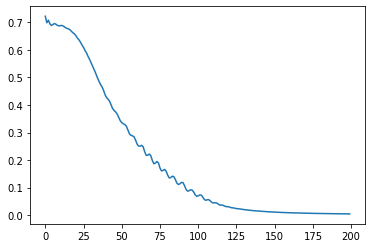

tensor(2.3858, grad_fn=<NllLossBackward>)
Test accuracy total: 65.22 %; correct: 15; wrong: 8;
Test accuracy doubt: 58.33 %; correct: 7; wrong: 5;
Test accuracy no-doubt: 72.73 %; correct: 8; wrong: 3;

Epoch: 0/200; Loss: 0.6942; Accuracy: 52.00 %
Epoch: 50/200; Loss: 0.3765; Accuracy: 82.57 %
Epoch: 100/200; Loss: 0.0854; Accuracy: 98.57 %
Epoch: 150/200; Loss: 0.0123; Accuracy: 100.00 %


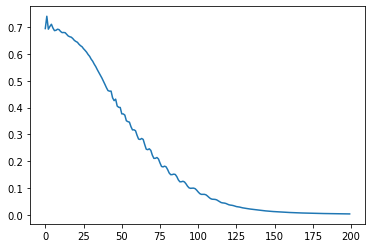

tensor(1.9403, grad_fn=<NllLossBackward>)
Test accuracy total: 61.11 %; correct: 11; wrong: 7;
Test accuracy doubt: 57.14 %; correct: 4; wrong: 3;
Test accuracy no-doubt: 63.64 %; correct: 7; wrong: 4;

Epoch: 0/200; Loss: 0.8335; Accuracy: 49.00 %
Epoch: 50/200; Loss: 0.5481; Accuracy: 69.63 %
Epoch: 100/200; Loss: 0.1450; Accuracy: 96.85 %
Epoch: 150/200; Loss: 0.0270; Accuracy: 99.71 %


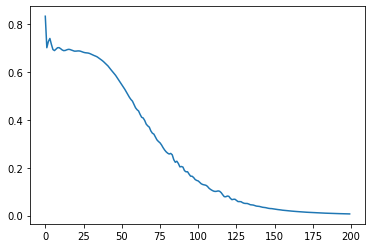

tensor(2.3249, grad_fn=<NllLossBackward>)
Test accuracy total: 47.37 %; correct: 9; wrong: 10;
Test accuracy doubt: 50.00 %; correct: 2; wrong: 2;
Test accuracy no-doubt: 46.67 %; correct: 7; wrong: 8;

Epoch: 0/200; Loss: 0.8664; Accuracy: 52.33 %
Epoch: 50/200; Loss: 0.5562; Accuracy: 73.84 %
Epoch: 100/200; Loss: 0.1479; Accuracy: 95.64 %
Epoch: 150/200; Loss: 0.0306; Accuracy: 99.71 %


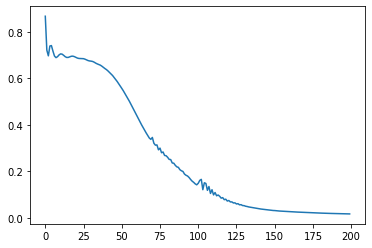

tensor(2.8822, grad_fn=<NllLossBackward>)
Test accuracy total: 54.17 %; correct: 13; wrong: 11;
Test accuracy doubt: 54.55 %; correct: 6; wrong: 5;
Test accuracy no-doubt: 53.85 %; correct: 7; wrong: 6;

Epoch: 0/200; Loss: 0.7518; Accuracy: 47.54 %
Epoch: 50/200; Loss: 0.3959; Accuracy: 85.22 %
Epoch: 100/200; Loss: 0.0979; Accuracy: 97.10 %
Epoch: 150/200; Loss: 0.0149; Accuracy: 100.00 %


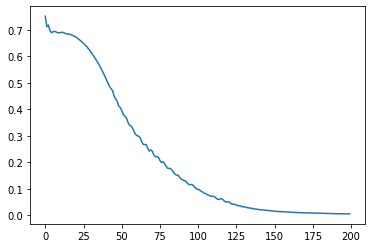

tensor(3.9335, grad_fn=<NllLossBackward>)
Test accuracy total: 34.78 %; correct: 8; wrong: 15;
Test accuracy doubt: 36.36 %; correct: 4; wrong: 7;
Test accuracy no-doubt: 33.33 %; correct: 4; wrong: 8;

Epoch: 0/200; Loss: 0.8080; Accuracy: 47.77 %
Epoch: 50/200; Loss: 0.5743; Accuracy: 70.92 %
Epoch: 100/200; Loss: 0.2183; Accuracy: 90.80 %
Epoch: 150/200; Loss: 0.0453; Accuracy: 99.70 %


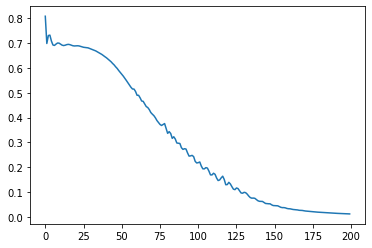

tensor(3.0722, grad_fn=<NllLossBackward>)
Test accuracy total: 61.29 %; correct: 19; wrong: 12;
Test accuracy doubt: 42.86 %; correct: 6; wrong: 8;
Test accuracy no-doubt: 76.47 %; correct: 13; wrong: 4;

Epoch: 0/200; Loss: 0.7503; Accuracy: 48.01 %
Epoch: 50/200; Loss: 0.4333; Accuracy: 80.97 %
Epoch: 100/200; Loss: 0.1733; Accuracy: 94.03 %
Epoch: 150/200; Loss: 0.0428; Accuracy: 99.43 %


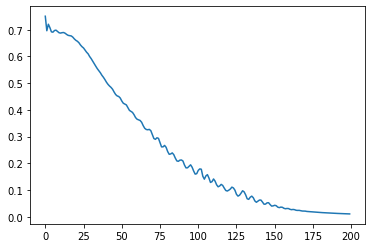

tensor(3.4713, grad_fn=<NllLossBackward>)
Test accuracy total: 56.25 %; correct: 9; wrong: 7;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 60.00 %; correct: 6; wrong: 4;

Epoch: 0/200; Loss: 0.9236; Accuracy: 47.28 %
Epoch: 50/200; Loss: 0.6091; Accuracy: 67.05 %
Epoch: 100/200; Loss: 0.1918; Accuracy: 93.41 %
Epoch: 150/200; Loss: 0.0369; Accuracy: 100.00 %


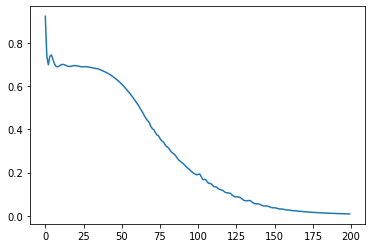

tensor(2.3126, grad_fn=<NllLossBackward>)
Test accuracy total: 68.42 %; correct: 13; wrong: 6;
Test accuracy doubt: 90.00 %; correct: 9; wrong: 1;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/200; Loss: 0.7219; Accuracy: 52.42 %
Epoch: 50/200; Loss: 0.3012; Accuracy: 87.75 %
Epoch: 100/200; Loss: 0.0576; Accuracy: 99.43 %
Epoch: 150/200; Loss: 0.0098; Accuracy: 100.00 %


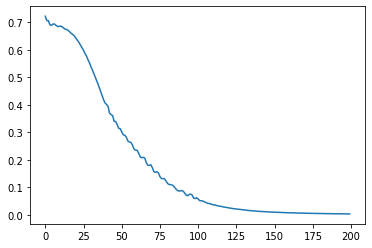

tensor(3.5749, grad_fn=<NllLossBackward>)
Test accuracy total: 52.94 %; correct: 9; wrong: 8;
Test accuracy doubt: 62.50 %; correct: 5; wrong: 3;
Test accuracy no-doubt: 44.44 %; correct: 4; wrong: 5;

Epoch: 0/200; Loss: 0.6994; Accuracy: 52.60 %
Epoch: 50/200; Loss: 0.3581; Accuracy: 84.68 %
Epoch: 100/200; Loss: 0.0919; Accuracy: 98.27 %
Epoch: 150/200; Loss: 0.0120; Accuracy: 100.00 %


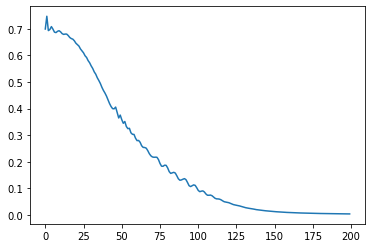

tensor(3.7500, grad_fn=<NllLossBackward>)
Test accuracy total: 40.91 %; correct: 9; wrong: 13;
Test accuracy doubt: 36.36 %; correct: 4; wrong: 7;
Test accuracy no-doubt: 45.45 %; correct: 5; wrong: 6;

Epoch: 0/200; Loss: 1.2082; Accuracy: 53.03 %
Epoch: 50/200; Loss: 0.6743; Accuracy: 60.52 %
Epoch: 100/200; Loss: 0.3515; Accuracy: 86.46 %
Epoch: 150/200; Loss: 0.0735; Accuracy: 99.14 %


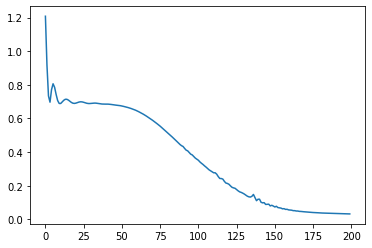

tensor(1.5351, grad_fn=<NllLossBackward>)
Test accuracy total: 61.90 %; correct: 13; wrong: 8;
Test accuracy doubt: 50.00 %; correct: 6; wrong: 6;
Test accuracy no-doubt: 77.78 %; correct: 7; wrong: 2;

Epoch: 0/200; Loss: 0.8447; Accuracy: 47.88 %
Epoch: 50/200; Loss: 0.5742; Accuracy: 70.54 %
Epoch: 100/200; Loss: 0.1769; Accuracy: 94.90 %
Epoch: 150/200; Loss: 0.0399; Accuracy: 99.72 %


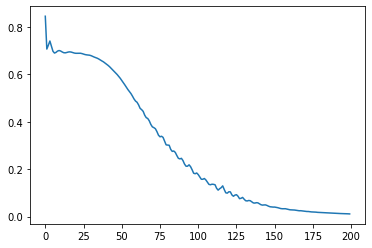

tensor(2.9714, grad_fn=<NllLossBackward>)
Test accuracy total: 40.00 %; correct: 6; wrong: 9;
Test accuracy doubt: 50.00 %; correct: 3; wrong: 3;
Test accuracy no-doubt: 33.33 %; correct: 3; wrong: 6;



In [9]:
all_losses = [[] for _ in range(num_participants)]
test_accuracies = []
test_accuracies_doubt = []
test_accuracies_nodoubt = []
for par in range(num_participants-1, -1, -1):

    features = data.iloc[:, :39]
    least_signifant_features = [11, 24, 35]
    features.drop(features.columns[least_signifant_features], axis=1, inplace=True)
    labels = data.iloc[:, 39:]

    msk = np.random.rand(len(data)) < 0.95
    features_train_df = features[msk]
    labels_train_df = labels[msk]
    features_test_df = features[~msk]
    labels_test_df = labels[~msk]

    X_train = torch.tensor(np.reshape(features_train_df.to_numpy(), (features_train_df.shape[0], 6, 6)), dtype=torch.double).float()
    Y_train = torch.tensor(labels_train_df.to_numpy(), dtype=torch.double)
    Y_train = Y_train.reshape((Y_train.shape[0],))

    X_test = torch.tensor(np.reshape(features_test_df.to_numpy(), (features_test_df.shape[0], 6, 6)), dtype=torch.double).float()
    Y_test = torch.tensor(labels_test_df.to_numpy(), dtype=torch.double)
    Y_test = Y_test.reshape((Y_test.shape[0]))

    net = nn.Sequential(Reshape(),
                    nn.Conv2d(1, 6, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(),
                    nn.Linear(16*1*1, 50),
                    nn.Sigmoid(),
                    nn.Linear(50, 2),
                    )
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # use crossentropy loss and adam for optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    # optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        Y_train_pred = net(X_train)
        Y_train_pred = Y_train_pred.float()
        loss = loss_func(Y_train_pred, Y_train.long())
        all_losses[par].append(loss.item())
        if epoch % 50 == 0:
            _, predicted = torch.max(Y_train_pred, 1)
            total = Y_train.data.size(0)
            correct = sum(predicted.data.numpy() == Y_train.data.numpy())
            print('Epoch: %d/%d; Loss: %.4f; Accuracy: %.2f %%' %(epoch, epochs, loss, 100*correct/total))
        net.zero_grad()
        loss.backward()
        optimizer.step()
    
    # extra visulization for training outcomes
    plt.figure()
    plt.plot(all_losses[par])
    plt.show()

    # test our network
    # X_test = torch.tensor(test_inputs.values, dtype=torch.float)
    # Y_test = torch.tensor(test_labels.values, dtype=torch.long)
    Y_test_pred = net(X_test)
    Y_test_pred = Y_test_pred.float()
    loss = loss_func(Y_test_pred, Y_test.long())
    print(loss)
    _, predicted = torch.max(Y_test_pred, 1)
    total_test = Y_test.shape[0]
    correct_test = sum(predicted.data.numpy() == Y_test.data.numpy())
    # calculate doubt and trust separately
    correct_doubt, correct_nodoubt, total_doubt, total_nodoubt = 0, 0, 0, 0
    for i in range(total_test):
        if Y_test.data.numpy()[i] == 1:
            total_nodoubt += 1
            if predicted.data.numpy()[i] == 1:
                correct_nodoubt += 1
        else:
            total_doubt += 1
            if predicted.data.numpy()[i] == 0:
                correct_doubt += 1
    test_accuracies.append(correct_test/total_test)
    if total_doubt != 0:
        test_accuracies_doubt.append(correct_doubt/total_doubt)
    if total_nodoubt != 0:
        test_accuracies_nodoubt.append(correct_nodoubt/total_nodoubt)
    print('Test accuracy total: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies[-1], correct_test, total_test-correct_test))
    print('Test accuracy doubt: %.2f %%; correct: %d; wrong: %d;' %(100*test_accuracies_doubt[-1], correct_doubt, total_doubt-correct_doubt))
    print('Test accuracy no-doubt: %.2f %%; correct: %d; wrong: %d;\n' %(100*test_accuracies_nodoubt[-1], correct_nodoubt, total_nodoubt-correct_nodoubt))

In [10]:
X = torch.rand(size=(1, 1, 6, 6), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Reshape output shape: 	 torch.Size([1, 1, 6, 6])
Conv2d output shape: 	 torch.Size([1, 6, 6, 6])
ReLU output shape: 	 torch.Size([1, 6, 6, 6])
MaxPool2d output shape: 	 torch.Size([1, 6, 3, 3])
Conv2d output shape: 	 torch.Size([1, 16, 3, 3])
ReLU output shape: 	 torch.Size([1, 16, 3, 3])
MaxPool2d output shape: 	 torch.Size([1, 16, 1, 1])
Flatten output shape: 	 torch.Size([1, 16])
Linear output shape: 	 torch.Size([1, 50])
Sigmoid output shape: 	 torch.Size([1, 50])
Linear output shape: 	 torch.Size([1, 2])


In [11]:
print(*[(name, param.shape) for name, param in net.named_parameters()])
# weight_input2hidden = np.absolute(net.state_dict()['1.weight'].data.numpy())
# weight_hidden2output = np.absolute(net.state_dict()['3.weight'].data.numpy())
# weight_input2hidden /= weight_input2hidden.sum(axis=1, keepdims=True)
# weight_hidden2output /= weight_hidden2output.sum(axis=1, keepdims=True)
# # calculate the Q weight matrix
# Q = np.dot(weight_hidden2output, weight_input2hidden).sum(axis=0)
# np.argsort(Q)

('1.weight', torch.Size([6, 1, 5, 5])) ('1.bias', torch.Size([6])) ('4.weight', torch.Size([16, 6, 5, 5])) ('4.bias', torch.Size([16])) ('8.weight', torch.Size([50, 16])) ('8.bias', torch.Size([50])) ('10.weight', torch.Size([2, 50])) ('10.bias', torch.Size([2]))


In [12]:
# show accuracies
print('Total accuracy: %.3f' %(sum(test_accuracies)/len(test_accuracies)))
print('Doubt accuracy: %.3f' %(sum(test_accuracies_doubt)/len(test_accuracies_doubt)))
print('Trust accuracy: %.3f' %(sum(test_accuracies_nodoubt)/len(test_accuracies_nodoubt)))

Total accuracy: 0.552
Doubt accuracy: 0.546
Trust accuracy: 0.579
